<a href="https://colab.research.google.com/github/mnsosa/argentina_programa/blob/master/notebooks/Pandas%2C_ML%2C_RegLog%C3%ADstica_y_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística y regresión lineal

Notas mías:
1. Grabación de datos de Messi
1. En vivo ejemplo del libro
1. Hablar sobre el big picture y todo el proceso del machine learning
1. Guiarme del libro

## Proyecto de Machine Learning

Los principales pasos que se deben seguir cuando uno comienza un proyeco de machine learning son:

1. Ver el _big picture_
1. Buscar _insights_ en los datos, explorándolos, visualizándolos
1. Preparar los datos para el modelo de machine learning
1. Seleccionar un modelo y entrenarlo
1. Seguir ajustando el modelo, buscar hiperparámetros
1. Presentar la solución

In [2]:
# importamos las librerías a usar. Para esta etapa, usaremos pandas
import pandas as pd

#### ¿Qué es pandas?

Es la librería más conocida para manipular datos en Python. El formato más utilizado es el de Dataframe y se podría decir que es el Excel de Python.

Pandas también ofrece una serie de herramientas y métodos para manipular y analizar datos de manera eficiente. Esto incluye funciones para realizar operaciones estadísticas básicas, como la agregación y la visualización de datos

#### Dataframes

La principal característica de Pandas es su estructura de datos de alto nivel, que se conoce como DataFrame. Un DataFrame de Pandas es similar a una hoja de cálculo en un programa como Microsoft Excel, pero tiene capacidades y funcionalidades adicionales que lo hacen muy útil para el análisis de datos.


Descarguemos los datos usando Git, por ahora sólo ejecuten la siguiente celda.

### 0. Obtener los datos

In [1]:
!git clone https://github.com/mnsosa/argentina_programa.git

Cloning into 'argentina_programa'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 1), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 4.94 KiB | 2.47 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
datos_cardiacos = pd.read_csv("/content/argentina_programa/datos/heart_failure_clinical_records_dataset.csv")
datos_cardiacos

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#### Cuestiones básicas de Pandas 🐼

In [5]:
# veamos el tipo de dato
type(datos_cardiacos)

pandas.core.frame.DataFrame

In [6]:
# obtener una columna del dataframe
datos_cardiacos["age"]

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

In [7]:
# contar valores de una columna
datos_cardiacos["anaemia"].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [8]:
datos_cardiacos["diabetes"].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [23]:
datos_cardiacos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [24]:
# da verdadero o falso según ambas columnas sean iguales
# (o no tienen nada o tienen ambos)
datos_cardiacos["anaemia"] == datos_cardiacos["diabetes"]
# a esto se le llama "máscara", se refiere a una serie booleana

0       True
1       True
2       True
3      False
4       True
       ...  
294    False
295     True
296    False
297     True
298     True
Length: 299, dtype: bool

In [26]:
# las máscaras pueden usarse para filtrar filas de un dataframe según
# sean 0 o 1 los valores de la máscara (solo toma las filas donde hay 1)

mascara = datos_cardiacos["anaemia"] == datos_cardiacos["diabetes"]

datos_cardiacos[mascara]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.00,1.4,139,1,0,258,0
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [29]:
datos_cardiacos[mascara]["anaemia"].value_counts()

0    98
1    53
Name: anaemia, dtype: int64

In [31]:
# cuántos tienen presión cardíaca alta?
datos_cardiacos["high_blood_pressure"].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

### 1. Tratamiento de datos

Hay que elegir qué variable predecir y con qué entradas.

En este ejemplo, claro está que podríamos predecir si una persona murió o no según los datos.

Propongo
- Salida: si murió
- Entrada: datos de salud de la persona

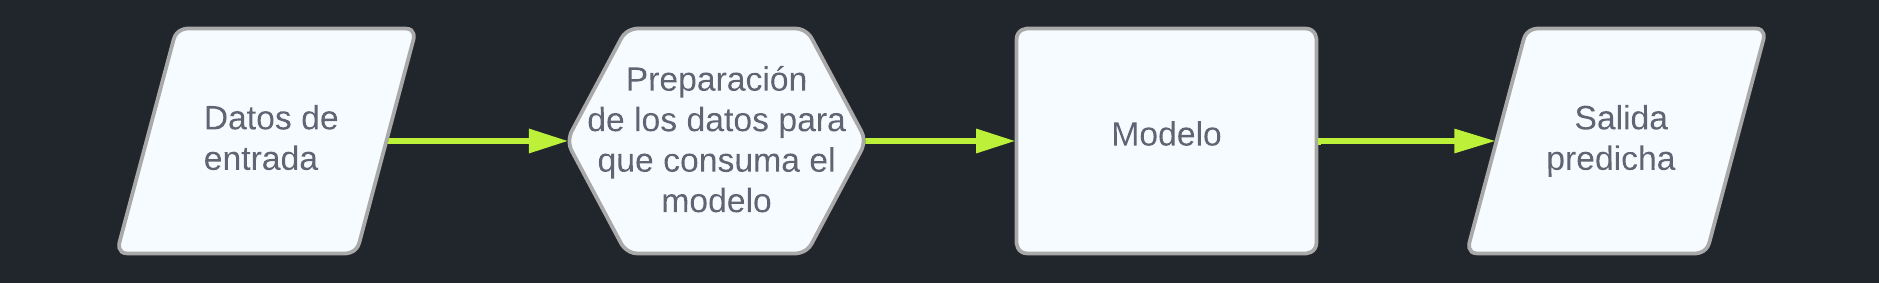